In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [147]:
df = pd.DataFrame({'Company': ['Amazon','Google','Facebook','Apple'], 
                    'TV': [230,44,17,151], 
                    'Radio': [37,39,45,41], 
                    'News': [69,23,34,13], 
                    'Units': [22,10,18,18],
                    'Bias': [1,1,1,1]
                  })   
df

,Company,TV,Radio,News,Units,Bias
0,Amazon,230,37,69,22,1
1,Google,44,39,23,10,1
2,Facebook,17,45,34,18,1
3,Apple,151,41,13,18,1


#### Normalization


In [18]:
def normalize(feature):
    rng = df[feature].max() - df[feature].min()
    mean = df[feature].mean()    
    return df[feature].apply(lambda x: (x-mean)/rng)
   
df['TV'] = normalize('TV')
df['Radio'] = normalize('Radio')
df['News'] = normalize('News')
df

,Company,TV,Radio,News,Units
0,Amazon,0.561033,-0.4375,0.611607,22
1,Google,-0.312207,-0.1875,-0.209821,10
2,Facebook,-0.438967,0.5625,-0.013393,18
3,Apple,0.190141,0.0625,-0.388393,18


 #### Predict function


In [148]:
w1 = 25
w2 = 10
w3 = 10

x1 = df['TV'].iloc[0]
x2 = df['Radio'].iloc[0]
x3 = df['News'].iloc[0]
b = df['Bias'].iloc[0]
                     
y = w1*x1 + w2*x2 + w3*x3 + b
y

6811

#### Cost function (MSE):
$$ 1/2n \sum (y - (w1x1 + w2x2 + w3x3))^2 $$

In [149]:
w1 = .1
w2 = .4
w3 = .8

def mse(w1, w2, w3):
    pred = df['TV']*w1 + df['Radio']*w2 + df['News']*w3 + df['Bias']
    sq_err = (df['Units']-pred)**2
    return (1/(2*len(df['Units']))) * sq_err.sum()

mse(w1, w2, w3)    

945.2975000000001

#### Gradient Descent

5.9714819221026785


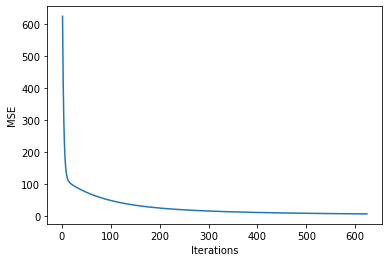

In [161]:
w1 = .1
w2 = .4
w3 = .8

mse_hist = []

for i in range(500):     
    target = df['Units']
    ler_rate = .00001
    pred = df['TV']*w1 + df['Radio']*w2 + df['News']*w3 + df['Bias']
    
    d_w1 = ler_rate*np.mean(-df['TV']*(target-pred))
    d_w2 = ler_rate*np.mean(-df['Radio']*(target-pred))
    d_w3 = ler_rate*np.mean(-df['News']*(target-pred))
    
    w1 -= d_w1
    w2 -= d_w2
    w3 -= d_w3
    
    mse_hist.append(mse(w1, w2, w3))


print(mse(w1, w2, w3))

ax = sns.lineplot(x=np.linspace(1,max(mse_hist), len(mse_hist)), y=mse_hist);
ax.set(xlabel='Iterations', ylabel='MSE');

In [162]:
"weights: ", w1, w2, w3

('weights: ', 0.012863805629199174, 0.1761046097514764, 0.2076119019692644)

#### Prediction: 

In [164]:
y = 230*w1 + 37*w2 + 69*w3
y

23.79976709139968